# Exploring Model For Pollen Count

In this notebook, we will perform data preprocessing for the pollen count data. We will also apply feature selection methods on the dataset. We will try several regression models to compare and discuss the most reasonable and appropriate model.

In [1]:
import pickle
import datetime
import pandas as pd
import numpy as np

# visulization
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

## Preprocessing Steps
We load two datasets: gfs dataset and the grass count dataset:

In [2]:
weather_df = pd.read_csv('all_data.csv')
grass_df = pd.read_csv('../preprocessing/melbourne_grass_preprocessed.csv')

In [3]:
weather_df

,coord,t_mean_9am,t_min_9am,t_max_9am,t_sd_9am,t_2m_mean_9am,t_2m_min_9am,t_2m_max_9am,t_2m_sd_9am,msl_mean_9am,...,u_10m_sd_4pm,v_10m_mean_4pm,v_10m_min_4pm,v_10m_max_4pm,v_10m_sd_4pm,pwat_mean_4pm,pwat_min_4pm,pwat_max_4pm,pwat_sd_4pm,date
0,"(145,-38)",285.8750,280.10000,290.8,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,0.499166,3.300000,1.499999,6.000000,1.961293,13.875000,13.000000,14.900000,0.880814,2000-01-01
1,"(145,-38)",285.8750,280.10000,290.8,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,1.175797,-2.450000,-8.000000,2.900000,5.402777,16.925000,13.600000,20.000000,2.780138,2000-01-02
2,"(145,-38)",285.8750,280.10000,290.8,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,2.538208,3.100000,1.099999,5.700000,1.971464,22.625000,18.800000,24.700000,2.617091,2000-01-03
3,"(145,-38)",285.8750,280.10000,290.8,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,2.053453,4.850000,3.500000,6.200000,1.161895,16.400000,12.300000,20.200000,3.799123,2000-01-04
4,"(145,-38)",285.8750,280.10000,290.8,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,0.618467,3.975000,2.800000,5.600000,1.286792,14.550000,13.400000,15.100000,0.776745,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296,"(145,-38)",285.1931,285.12766,285.3,0.077648,283.9077,282.96112,285.07898,0.876952,103015.92,...,1.610581,-1.089071,-7.484739,3.261987,5.142459,7.042216,6.314592,7.748879,0.727160,2022-09-13
8297,"(145,-38)",285.1931,285.12766,285.3,0.077648,283.9077,282.96112,285.07898,0.876952,103015.92,...,0.222384,-7.259369,-8.018267,-5.899118,0.970635,19.331320,11.912160,24.669758,5.546390,2022-09-14
8298,"(145,-38)",285.1931,285.12766,285.3,0.077648,283.9077,282.96112,285.07898,0.876952,103015.92,...,0.674031,-5.383536,-6.902886,-4.472268,1.053194,15.732620,13.822749,16.694824,1.317087,2022-09-15
8299,"(145,-38)",285.1931,285.12766,285.3,0.077648,283.9077,282.96112,285.07898,0.876952,103015.92,...,0.380408,-7.232979,-10.783916,-5.370007,2.497160,17.352787,14.354100,20.170527,2.413311,2022-09-16


In [4]:
grass_df['Count Date'] = grass_df['Count Date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
weather_df['date'] = weather_df['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

In [5]:
df = pd.merge(grass_df, weather_df, left_on='Count Date', right_on='date', how='left').drop('Count Date', axis=1)

In [6]:
# check missing values
df.isna().values.sum()

174812

In [7]:
# dul with missing values
df = df.dropna()
df = df.drop('coord', axis=1)

In [8]:
df

,grass_count,t_mean_9am,t_min_9am,t_max_9am,t_sd_9am,t_2m_mean_9am,t_2m_min_9am,t_2m_max_9am,t_2m_sd_9am,msl_mean_9am,...,u_10m_sd_4pm,v_10m_mean_4pm,v_10m_min_4pm,v_10m_max_4pm,v_10m_sd_4pm,pwat_mean_4pm,pwat_min_4pm,pwat_max_4pm,pwat_sd_4pm,date
3014,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,0.499166,3.300000,1.499999,6.000000,1.961293,13.875000,13.000000,14.900000,0.880814,2000-01-01
3015,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,1.175797,-2.450000,-8.000000,2.900000,5.402777,16.925000,13.600000,20.000000,2.780138,2000-01-02
3016,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,2.538208,3.100000,1.099999,5.700000,1.971464,22.625000,18.800000,24.700000,2.617091,2000-01-03
3017,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,2.053453,4.850000,3.500000,6.200000,1.161895,16.400000,12.300000,20.200000,3.799123,2000-01-04
3018,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,0.618467,3.975000,2.800000,5.600000,1.286792,14.550000,13.400000,15.100000,0.776745,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716,1.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,5.365728,3.833712,2.327358,6.158801,1.793364,22.789146,15.239947,33.476690,8.651606,2021-01-27
10717,7.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,2.745395,0.180323,-2.282188,1.797918,1.736471,42.359985,39.000000,46.439950,3.152500,2021-01-28
10718,2.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,3.541771,-1.670463,-5.191489,1.783296,3.729120,31.447510,19.669306,41.039948,9.968616,2021-01-29
10719,0.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,2.336742,5.019487,3.665413,7.490205,1.705057,14.177647,12.470641,17.039948,2.022703,2021-01-30


In [9]:
# sort the whole dataframe by date (in time order)
df = df.sort_values(by=['date'])

# add a new column "year" to count each year's data
df['year'] = df['date'].dt.to_period("Y").astype(str)

# for training
df['train'] = df['date'].dt.to_period("M").astype(str)

# add a new column "month" to count each year's data
df['month'] = df['date'].dt.strftime('%m').astype(str)
# df['season'] = df['month'].map({'12':1, '01':1, '02':1, '03':2, '04': 2, '05': 2, '06':3, '07':3, '08':3, '09':4, '10':4, '11':4})

# show the counts of each year
df['year'].value_counts(ascending = False)

2008    371
2000    366
2012    366
2020    366
2004    366
2016    366
2019    365
2018    365
2017    365
2015    365
2014    365
2013    365
2011    365
2001    365
2010    365
2009    365
2007    365
2006    365
2005    365
2003    365
2002    365
2021     31
Name: year, dtype: int64

In [10]:
df = df[df['year'] != '2021']
df

,grass_count,t_mean_9am,t_min_9am,t_max_9am,t_sd_9am,t_2m_mean_9am,t_2m_min_9am,t_2m_max_9am,t_2m_sd_9am,msl_mean_9am,...,v_10m_max_4pm,v_10m_sd_4pm,pwat_mean_4pm,pwat_min_4pm,pwat_max_4pm,pwat_sd_4pm,date,year,train,month
3014,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,6.000000,1.961293,13.875000,13.000000,14.900000,0.880814,2000-01-01,2000,2000-01,01
3015,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,2.900000,5.402777,16.925000,13.600000,20.000000,2.780138,2000-01-02,2000,2000-01,01
3016,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,5.700000,1.971464,22.625000,18.800000,24.700000,2.617091,2000-01-03,2000,2000-01,01
3017,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,6.200000,1.161895,16.400000,12.300000,20.200000,3.799123,2000-01-04,2000,2000-01,01
3018,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,5.600000,1.286792,14.550000,13.400000,15.100000,0.776745,2000-01-05,2000,2000-01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,119.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,8.915293,2.105036,19.927906,11.900000,29.617905,9.217530,2020-12-27,2020,2020-12,12
10686,52.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,5.712373,1.995186,15.316968,14.800000,15.933380,0.585012,2020-12-28,2020,2020-12,12
10687,2.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,4.508652,0.843708,20.322964,17.733380,24.500000,3.043544,2020-12-29,2020,2020-12,12
10688,9.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,6.708228,0.871834,23.850000,21.100000,26.000000,2.350177,2020-12-30,2020,2020-12,12


In [11]:
df['day'] = df['date'].apply(lambda x: x.strftime("%m-%d"))

In [12]:
day_list = list(pd.unique(df['day']))
pollen_day_list = day_list[274:]

In [13]:
np.mean(df[df['day'] == '10-01']['grass_count'])

5.904761904761905

In [15]:
df['seasonal_avg_count'] = 0
avg_list = []
for day in pollen_day_list:
    avg = np.mean(df[df['day'] == day]['grass_count'])
    df['seasonal_avg_count'][df['day'] == day] = avg
    avg_list.append(avg)


In [16]:
df.to_csv('gfs_preprocessed_new.csv', index=False)

In [17]:
seasonal_pollen_count = pd.DataFrame()
seasonal_pollen_count.index = pollen_day_list
seasonal_pollen_count['avg'] = avg_list

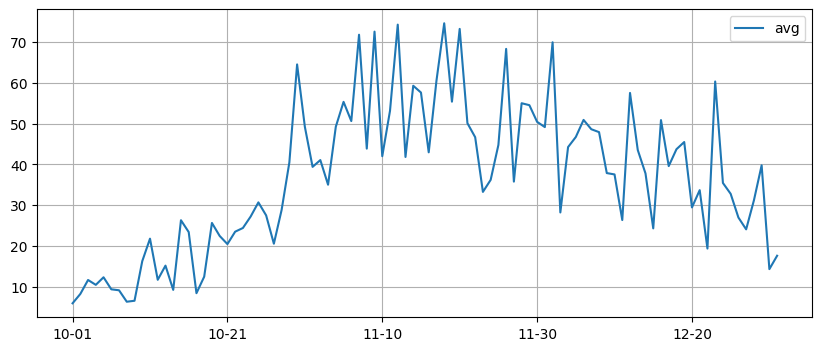

In [18]:
seasonal_pollen_count.plot(figsize=(10,4))
plt.grid()

In [19]:
df

,grass_count,t_mean_9am,t_min_9am,t_max_9am,t_sd_9am,t_2m_mean_9am,t_2m_min_9am,t_2m_max_9am,t_2m_sd_9am,msl_mean_9am,...,pwat_mean_4pm,pwat_min_4pm,pwat_max_4pm,pwat_sd_4pm,date,year,train,month,day,seasonal_avg_count
3014,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,13.875000,13.000000,14.900000,0.880814,2000-01-01,2000,2000-01,01,01-01,0.000000
3015,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,16.925000,13.600000,20.000000,2.780138,2000-01-02,2000,2000-01,01,01-02,0.000000
3016,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,22.625000,18.800000,24.700000,2.617091,2000-01-03,2000,2000-01,01,01-03,0.000000
3017,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,16.400000,12.300000,20.200000,3.799123,2000-01-04,2000,2000-01,01,01-04,0.000000
3018,0.0,285.87500,280.1000,290.80000,4.780080,285.7500,280.40000,290.30000,4.430575,101775.75,...,14.550000,13.400000,15.100000,0.776745,2000-01-05,2000,2000-01,01,01-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,119.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,19.927906,11.900000,29.617905,9.217530,2020-12-27,2020,2020-12,12,12-27,24.047619
10686,52.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,15.316968,14.800000,15.933380,0.585012,2020-12-28,2020,2020-12,12,12-28,31.142857
10687,2.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,20.322964,17.733380,24.500000,3.043544,2020-12-29,2020,2020-12,12,12-29,39.761905
10688,9.0,290.56924,290.1858,290.96576,0.372835,290.5599,286.59177,294.92386,3.661287,101139.20,...,23.850000,21.100000,26.000000,2.350177,2020-12-30,2020,2020-12,12,12-30,14.285714
